#  TRAFFIC ACCIDENTS ANALYSIS AND PREDICTION

### **Project Overview:**
The project aims to analyze and predict traffic accidents based on historical data. By identifying patterns, trends, and factors contributing to accidents (such as weather, time of day, road conditions, and traffic volume), the goal is to develop predictive models that can forecast accident occurrences and help improve road safety.

### **Objectives:**
1. **Accident Data Analysis:**
   - Analyze historical traffic accident data to understand accident distribution, common causes, and trends.
   - Identify patterns and factors that influence the occurrence of accidents (e.g., location, weather, time, etc.).

2. **Data Preprocessing:**
   - Clean the dataset by handling missing values, removing outliers, and normalizing the data.
   - Convert categorical variables (like road type or weather conditions) into usable formats.

3. **Feature Engineering:**
   - Create new features based on domain knowledge (e.g., hour of the day, weekday, or traffic volume) to better understand accident-prone situations.

4. **Exploratory Data Analysis (EDA):**
   - Use statistical methods and data visualization techniques (e.g., heatmaps, scatter plots, bar charts) to uncover patterns in the data.

5. **Prediction Model Development:**
   - Implement machine learning models (e.g., Random Forest, XGBoost, Logistic Regression, etc.) to predict the likelihood of accidents under various conditions.
   - Train the models using historical data, evaluate their performance with metrics like accuracy, precision, recall, and F1-score.

6. **Model Evaluation and Tuning:**
   - Fine-tune models using hyperparameter optimization techniques (e.g., grid search, cross-validation) to improve prediction accuracy.


### **Tools and Technologies Used:**
- **Programming Languages:** Python, R
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- **Data Sources:** Traffic accident databases, public government datasets
- **Models:** Random Forest, Decision Trees, Logistic Regression, XGBoost
- **Evaluation Metrics:** Accuracy, ROC-AUC, Precision, Recall

### **Outcome:**
The project results in a predictive model that can be used by authorities or businesses to improve road safety, allocate resources efficiently, and reduce traffic-related incidents.

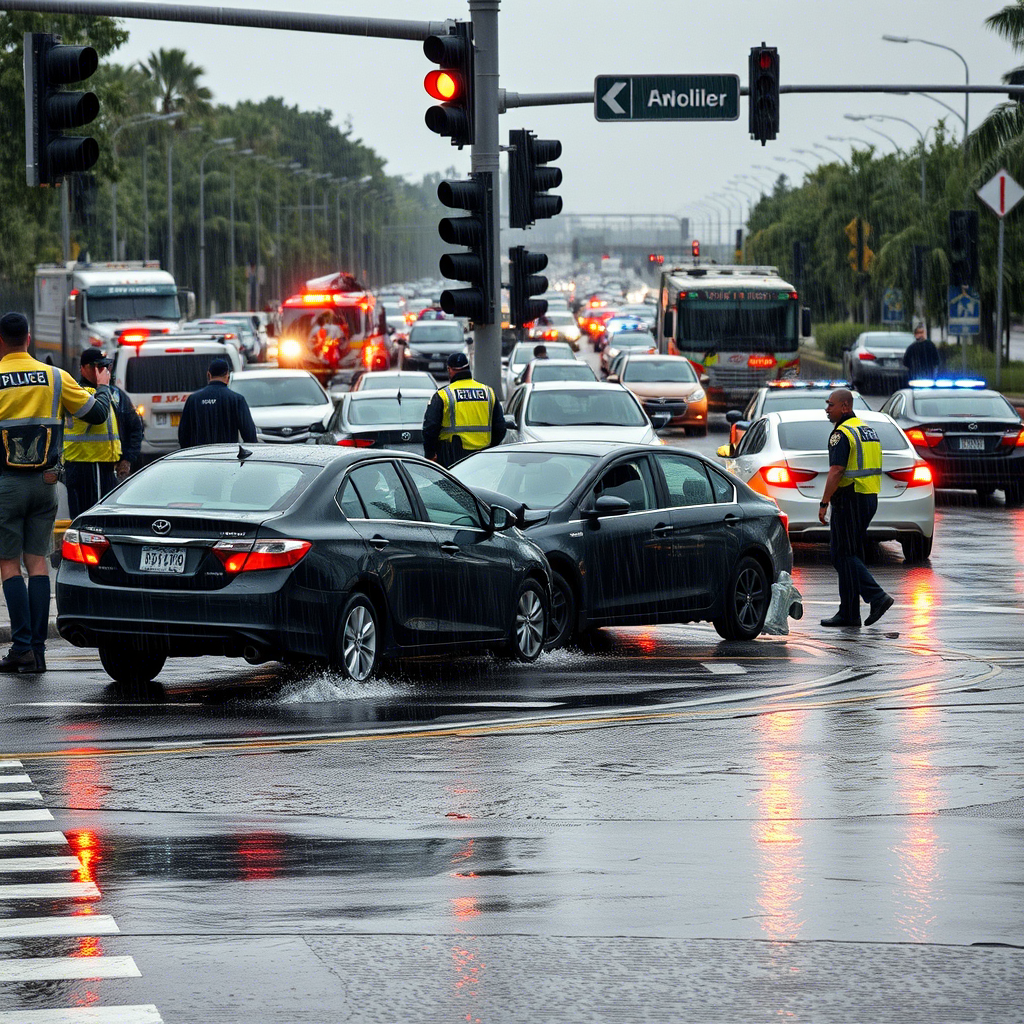

In [1]:
from IPython.display import Image
Image(filename='Accidents.png', width=600)

Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report ,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

Loading Dataset


In [3]:
df=pd.read_csv("D:\\Programming\\Datasets\\traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


### Data Exploration


Data exploration involves analyzing and summarizing datasets to understand their structure, relationships, and patterns. It includes inspecting variables, checking for missing values, identifying outliers, and visualizing data for insights.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [5]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [6]:
print(f"\nShape of the Dataset: {df.shape}")


Shape of the Dataset: (209306, 24)


### Data Cleaning

Data cleaning involves identifying and correcting errors or inconsistencies in a dataset. This includes handling missing values, removing duplicates, correcting data types, and addressing outliers to ensure accurate analysis.

In [7]:
print("\nNull values:")
df.isnull().sum()


Null values:


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
print("Columns in Dataset")
print(df.columns)

Columns in Dataset
Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


In [10]:
data=df.drop(columns='crash_date',axis='columns')

In [11]:
name_counts = data['crash_type'].value_counts()
print(name_counts)

most_common_name = name_counts.idxmax()
most_common_count = name_counts.max()

print(f'Most common name: {most_common_name} (Count: {most_common_count})')

crash_type
NO INJURY / DRIVE AWAY              117376
INJURY AND / OR TOW DUE TO CRASH     91930
Name: count, dtype: int64
Most common name: NO INJURY / DRIVE AWAY (Count: 117376)


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) involves analyzing a dataset to summarize its main characteristics. It includes visualizing distributions, identifying patterns, detecting outliers, and understanding relationships between variables before modeling.

In [12]:
data.corr(numeric_only=True)

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
num_units,1.000000,0.159857,0.029304,0.070088,0.121650,0.078163,0.188041,0.015629,0.002729,0.003158
injuries_total,0.159857,1.000000,0.097864,0.323319,0.769343,0.546309,-0.320762,-0.015469,-0.015230,0.013508
injuries_fatal,0.029304,0.097864,1.000000,0.049945,0.025832,0.007078,-0.034434,-0.004651,-0.001331,0.002018
injuries_incapacitating,0.070088,0.323319,0.049945,1.000000,0.038507,-0.003220,-0.119906,-0.010266,-0.007388,0.003984
injuries_non_incapacitating,0.121650,0.769343,0.025832,0.038507,1.000000,-0.022040,-0.252953,-0.014130,-0.012242,0.009618
injuries_reported_not_evident,0.078163,0.546309,0.007078,-0.003220,-0.022040,1.000000,-0.158083,-0.002349,-0.006342,0.008562
injuries_no_indication,0.188041,-0.320762,-0.034434,-0.119906,-0.252953,-0.158083,1.000000,0.050867,0.006497,-0.006167
crash_hour,0.015629,-0.015469,-0.004651,-0.010266,-0.014130,-0.002349,0.050867,1.000000,0.062326,0.003379
crash_day_of_week,0.002729,-0.015230,-0.001331,-0.007388,-0.012242,-0.006342,0.006497,0.062326,1.000000,-0.006240
crash_month,0.003158,0.013508,0.002018,0.003984,0.009618,0.008562,-0.006167,0.003379,-0.006240,1.000000


In [13]:

def analyze_column(data, column_name, day_mapping=None):

    if column_name == 'crash_day_of_week' and day_mapping:
        # If analyzing 'crash_day_of_week', map numeric values to day names
        values = data[column_name].map(day_mapping).value_counts().sort_index()
    else:
        # For crash_hour and crash_month, simply count the values
        values = data[column_name].value_counts().sort_index()

    # Find the max and min accidents
    max_value = values.idxmax()
    max_count = values.max()
    min_value = values.idxmin()
    min_count = values.min()

    return max_value, max_count, min_value, min_count

# Mapping for days of the week
day_mapping = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

# Analyze crash_hour
max_hour, max_hour_count, min_hour, min_hour_count = analyze_column(data, 'crash_hour')
print(f"Hour with the most accidents: {max_hour}:00 ({max_hour_count} accidents)")
print(f"Hour with the least accidents: {min_hour}:00 ({min_hour_count} accidents)")

# Analyze crash_month
max_month, max_month_count, min_month, min_month_count = analyze_column(data, 'crash_month')
print(f"Month with the most accidents: {max_month} ({max_month_count} accidents)")
print(f"Month with the least accidents: {min_month} ({min_month_count} accidents)")

# Analyze crash_day_of_week
max_day, max_day_count, min_day, min_day_count = analyze_column(data, 'crash_day_of_week', day_mapping)
print(f"Day with the most accidents: {max_day} ({max_day_count} accidents)")
print(f"Day with the least accidents: {min_day} ({min_day_count} accidents)")


Hour with the most accidents: 17:00 (16097 accidents)
Hour with the least accidents: 4:00 (2104 accidents)
Month with the most accidents: 10 (20089 accidents)
Month with the least accidents: 2 (14621 accidents)
Day with the most accidents: Sunday (34458 accidents)
Day with the least accidents: Tuesday (25246 accidents)


### Data Visualization

Data visualization is the graphical representation of data to identify trends, patterns, and insights. It uses charts, graphs, and plots to make complex data more accessible and interpretable for better decision-making.

Analysis of Total Injuries Across Various Categories

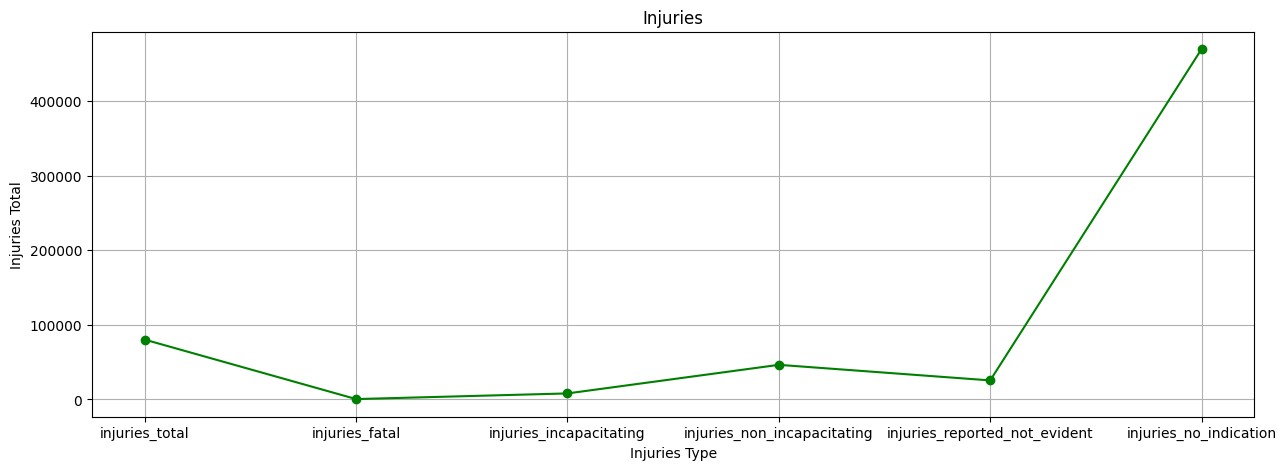

In [14]:
Injuries_type=['injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication']
Injuries_total=data[Injuries_type].sum()

plt.figure(figsize=(15,5))
Injuries_total.plot(kind='line',color='g',marker='o')
plt.grid(axis='both')
plt.xlabel("Injuries Type")
plt.ylabel("Injuries Total")
plt.title("Injuries")
plt.show()

Monthly Accident Trend Analysis

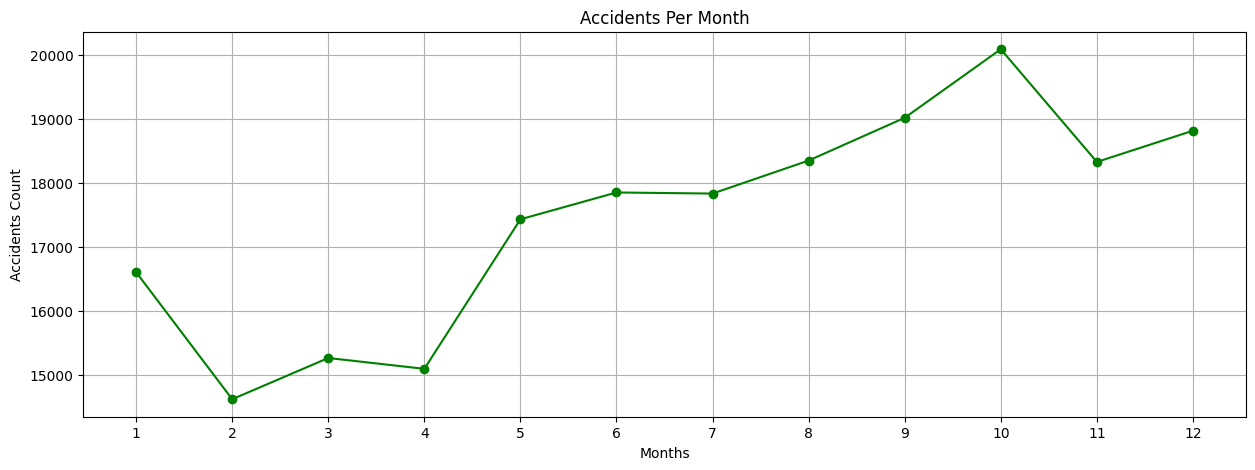

In [15]:
Accidents_per_month=data['crash_month'].value_counts().sort_index()
plt.figure(figsize=(15,5))
Accidents_per_month.plot(kind='line',color='g',marker='o')
plt.grid()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Months")
plt.ylabel("Accidents Count")
plt.title("Accidents Per Month")
plt.show()

Trend of Accidents by Day of the Week

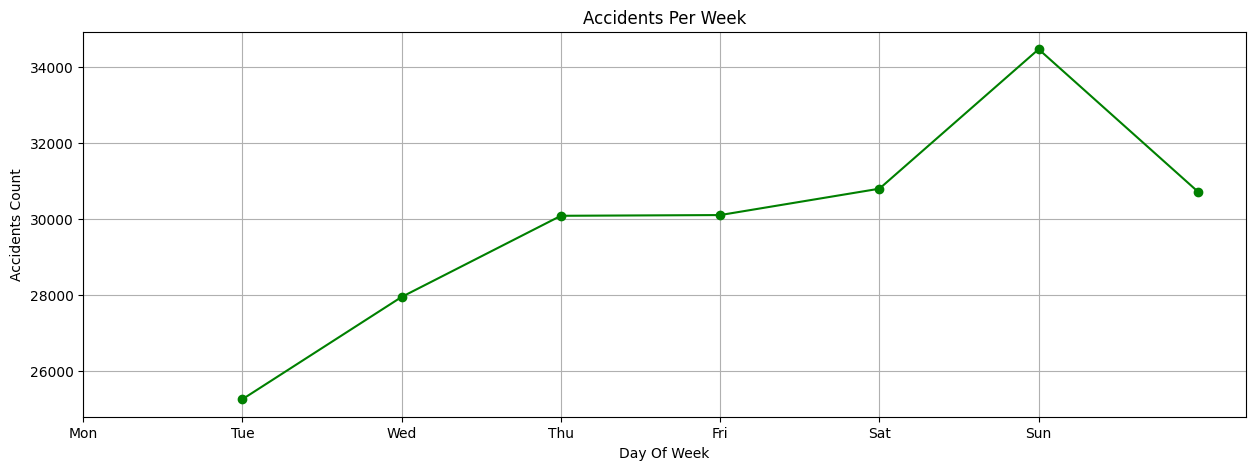

In [16]:
Accidents_per_week=data['crash_day_of_week'].value_counts().sort_index()
plt.figure(figsize=(15,5))
Accidents_per_week.plot(kind='line',marker='o',color='g')
plt.grid()
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day Of Week")
plt.ylabel("Accidents Count")
plt.title("Accidents Per Week")
plt.show()

Accident Distribution by Hour of the Day

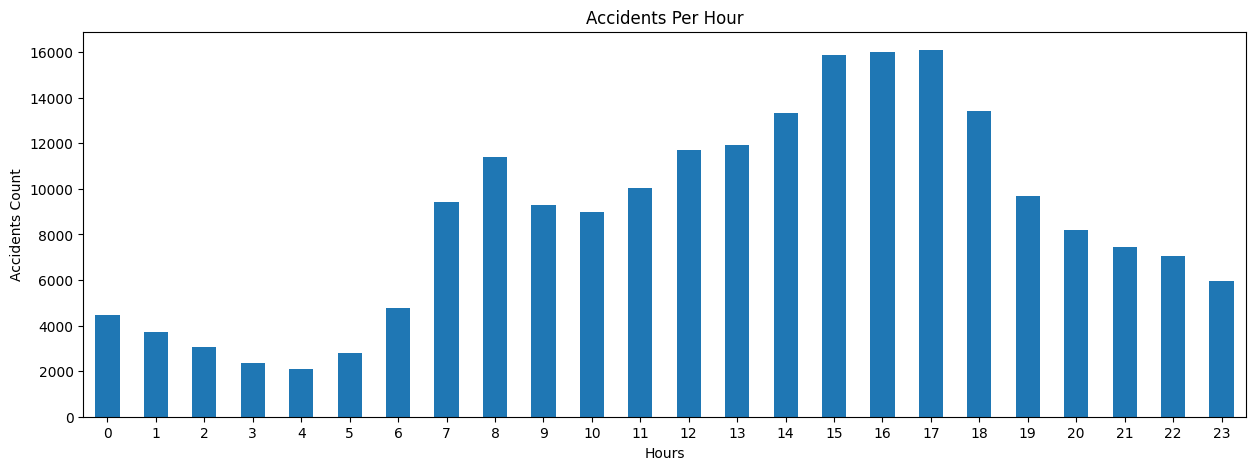

In [17]:
Accidents_per_hour = data['crash_hour'].value_counts().sort_index()
plt.figure(figsize=(15,5))
Accidents_per_hour.plot(kind='bar')
plt.xticks(range(0, 24),rotation=360)
plt.xlabel("Hours")
plt.ylabel("Accidents Count")
plt.title("Accidents Per Hour")
plt.show()

Accident Distribution by Lighting Condition

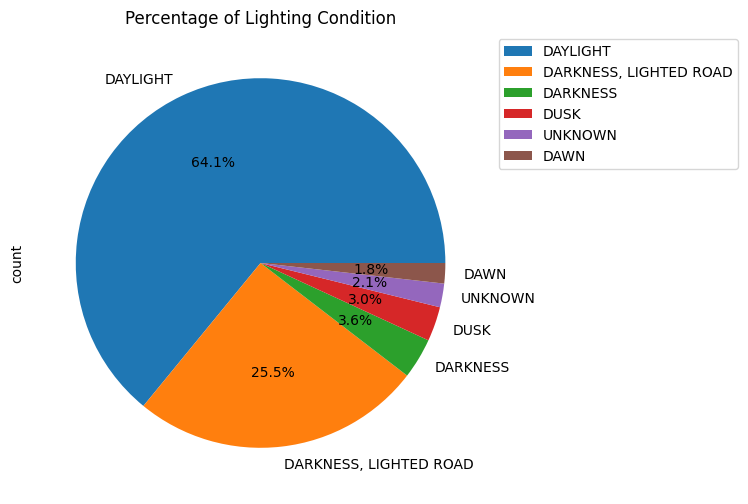

In [18]:
Lighting_condition=data['lighting_condition'].value_counts()
plt.figure(figsize=(20,6))
Lighting_condition.plot(kind='pie',autopct='%1.1f%%')
plt.title("Percentage of Lighting Condition")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Accident Frequency Based on Traffic Control Devices

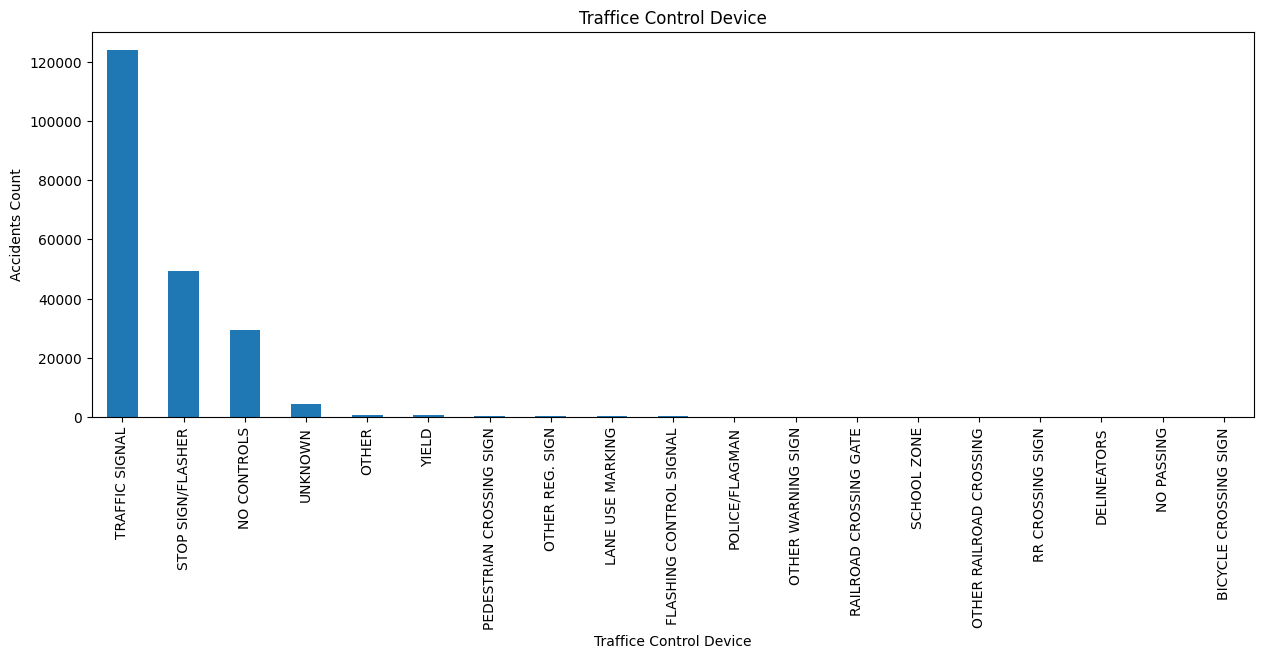

In [19]:
Traffic_control_device=data['traffic_control_device'].value_counts()
plt.figure(figsize=(15,5))
Traffic_control_device.plot(kind='bar')
plt.ylabel("Accidents Count")
plt.xlabel("Traffice Control Device")
plt.title("Traffice Control Device")
plt.show()

Accident Frequency by Weather Condition

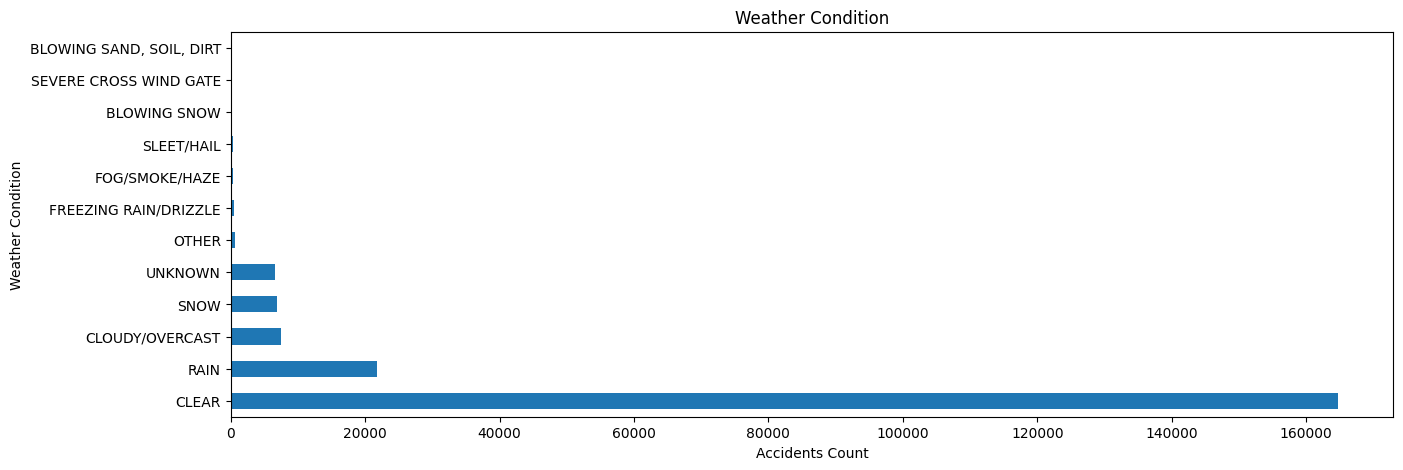

In [20]:
Weather_condition=data['weather_condition'].value_counts()
plt.figure(figsize=(15,5))
Weather_condition.plot(kind='barh')
plt.ylabel("Weather Condition")
plt.xlabel("Accidents Count")
plt.title("Weather Condition")
plt.show()

Crash Type Distribution: Visual Comparison

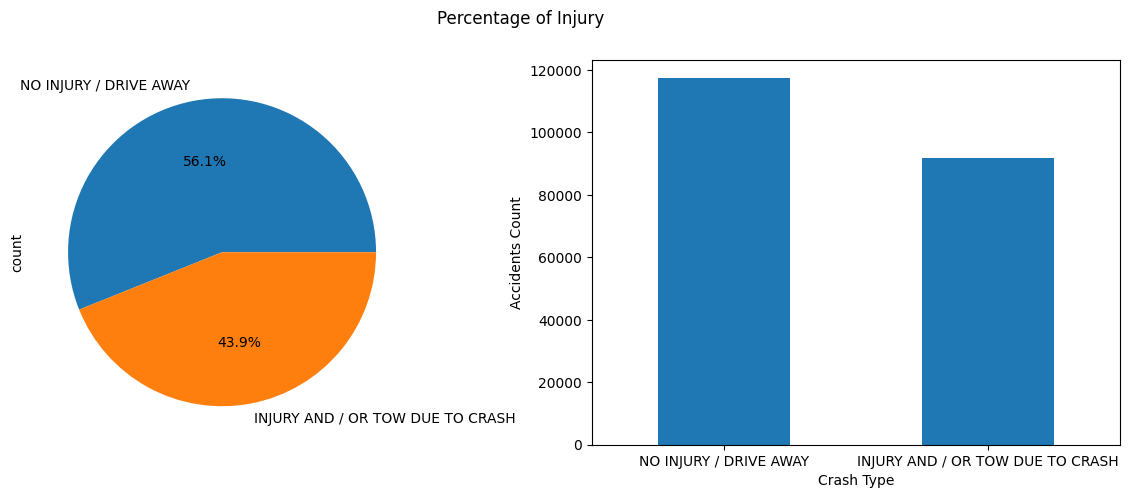

In [21]:
Crash_type=data['crash_type'].value_counts()
plt.figure(figsize=(15,5))

plt.suptitle("Percentage of Injury")

plt.subplot(1,2,1)
Crash_type.plot(kind='pie',autopct='%1.1f%%')


plt.subplot(1,2,2)
Crash_type.plot(kind='bar')
plt.xlabel("Crash Type")
plt.ylabel("Accidents Count")
plt.xticks(rotation=360)

plt.show()

Distribution of Most Severe Injuries in Accidents

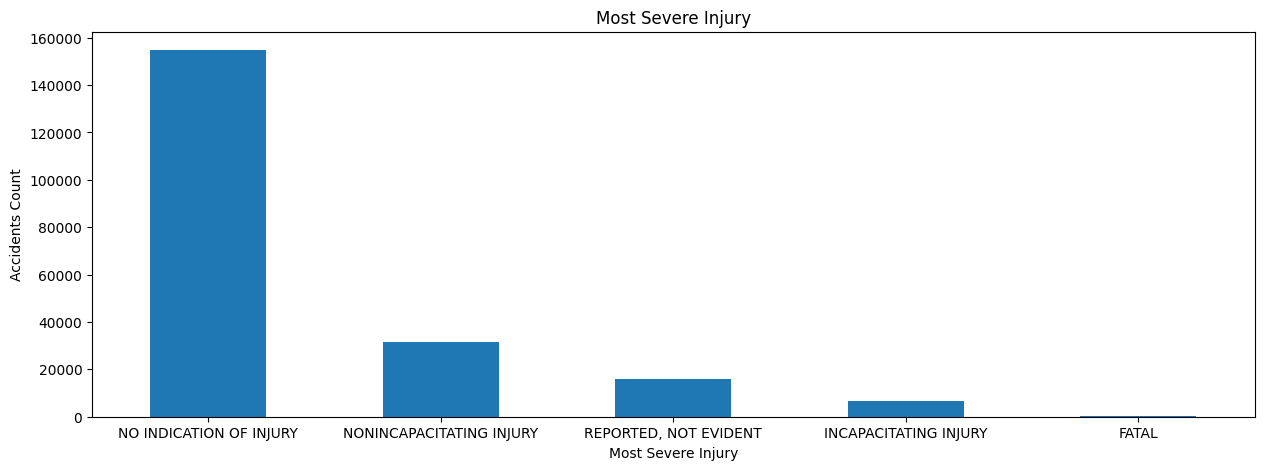

In [22]:
Most_severe_injury=data['most_severe_injury'].value_counts()
plt.figure(figsize=(15,5))
Most_severe_injury.plot(kind='bar')
plt.xticks(rotation=360)
plt.xlabel("Most Severe Injury")
plt.ylabel("Accidents Count")
plt.title("Most Severe Injury")
plt.show()

Comparison of Roadway Surface Conditions and Road Defects

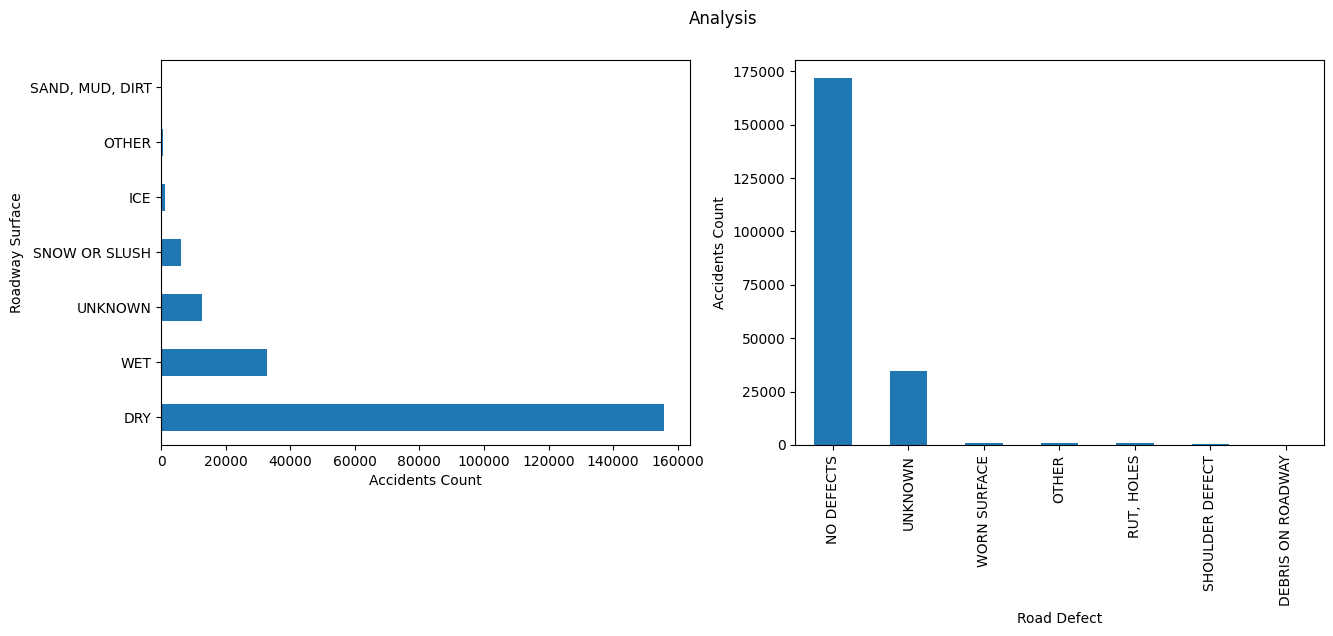

In [23]:
Roadway_surface=data['roadway_surface_cond'].value_counts()
Road_defect=data['road_defect'].value_counts()

plt.figure(figsize=(15,5))

plt.suptitle("Analysis")

plt.subplot(1,2,1)
Roadway_surface.plot(kind='barh')
plt.xlabel("Accidents Count")
plt.ylabel("Roadway Surface")

plt.subplot(1,2,2)
Road_defect.plot(kind='bar')
plt.xlabel("Road Defect")
plt.ylabel("Accidents Count")
plt.show()

Comprehensive Analysis of Accident Data

Text(0, 0.5, 'Accidents Count')

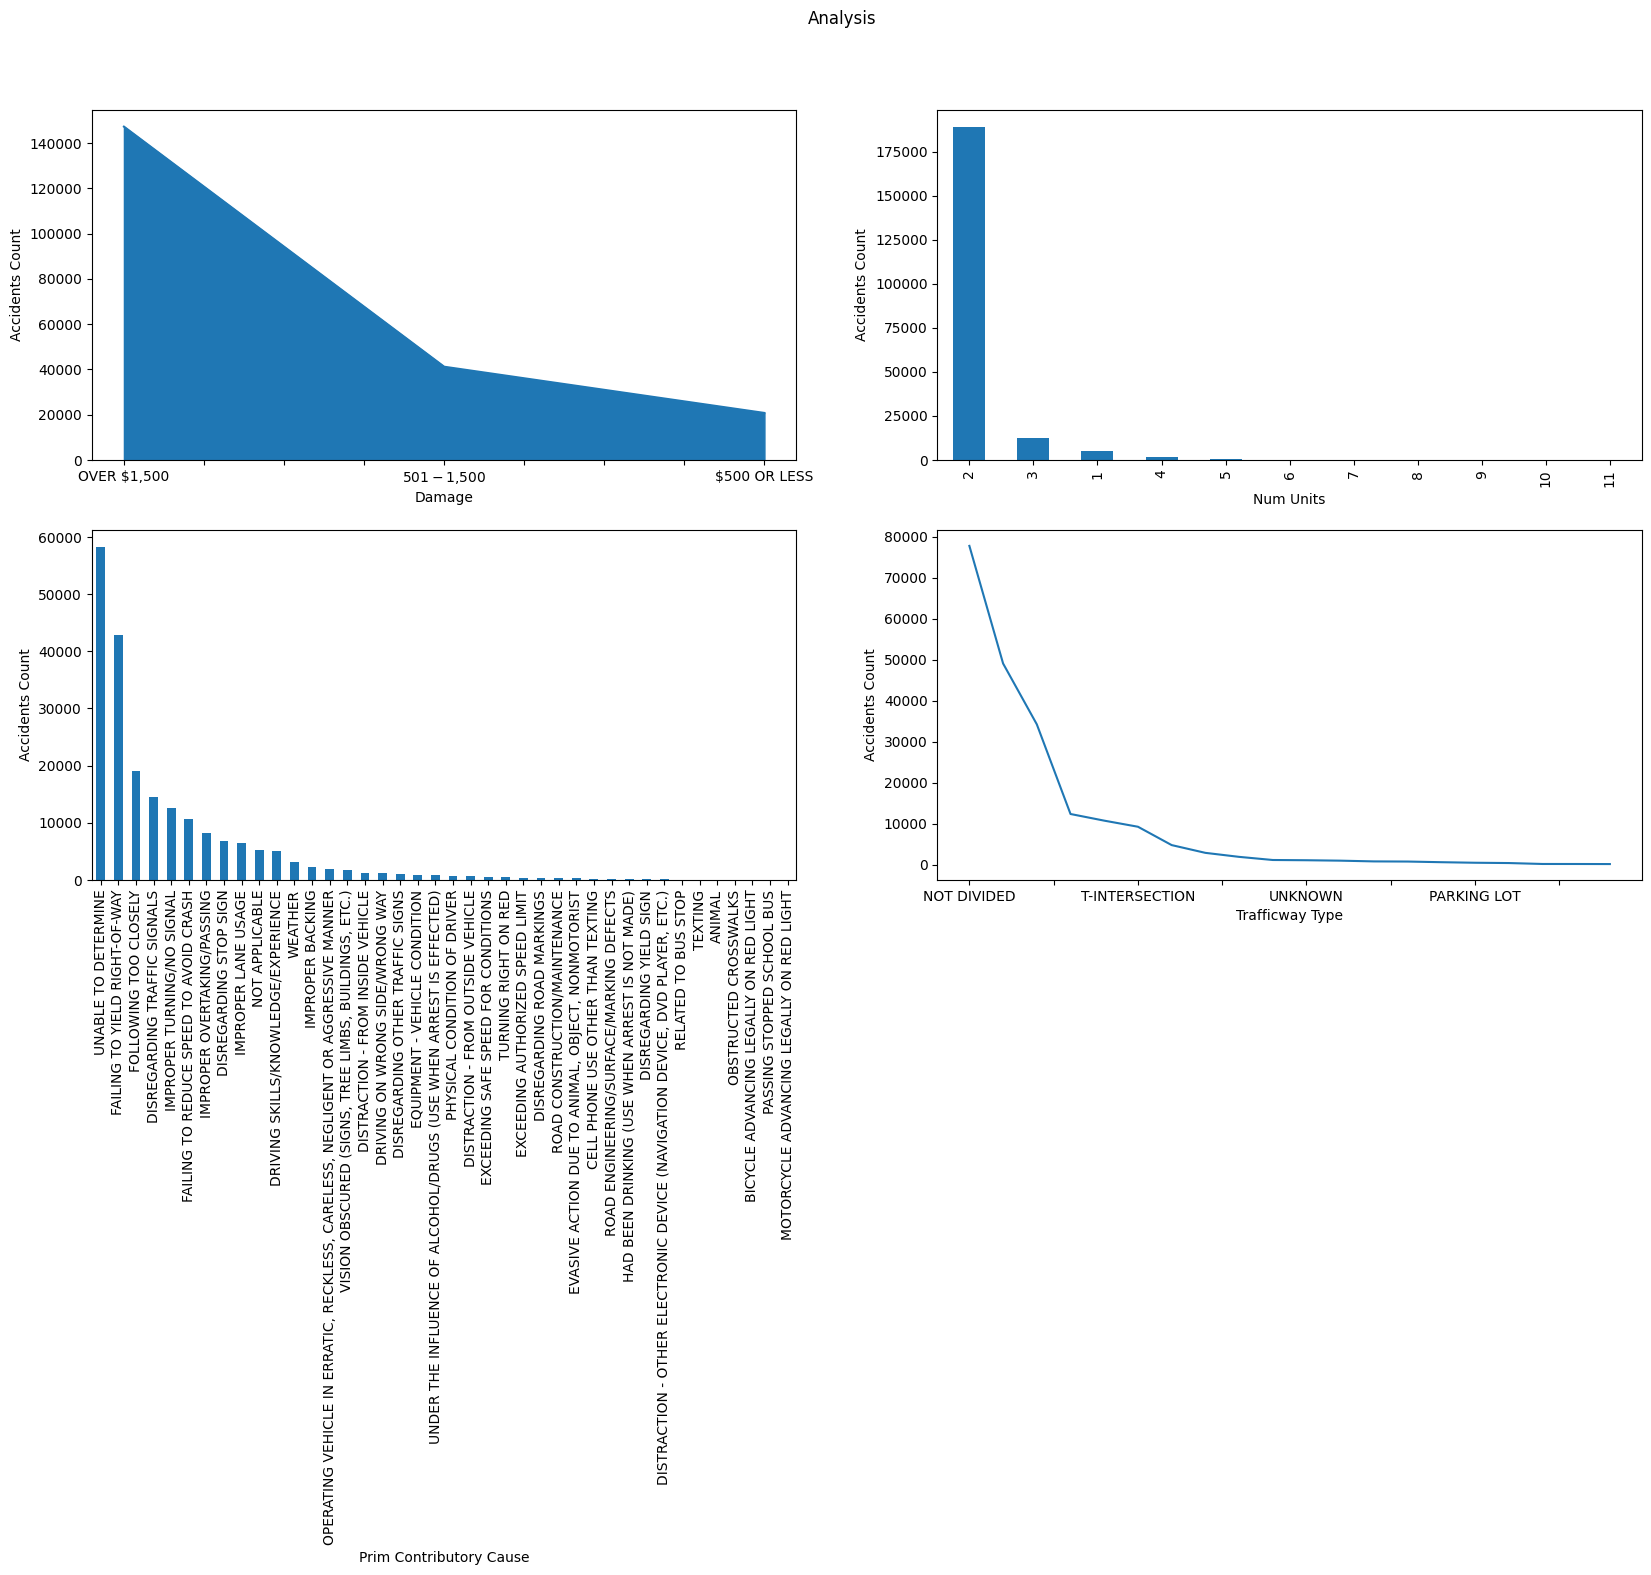

In [24]:
Damage=data['damage'].value_counts()
Num_units=data['num_units'].value_counts()
Trafficway_type=data['trafficway_type'].value_counts()
Prim_contributory_cause=data['prim_contributory_cause'].value_counts()

plt.figure(figsize=(20,10))

plt.suptitle("Analysis")

plt.subplot(2,2,1)
Damage.plot(kind='area')
plt.xlabel("Damage")
plt.ylabel("Accidents Count")

plt.subplot(2,2,2)
Num_units.plot(kind='bar')
plt.xlabel("Num Units")
plt.ylabel("Accidents Count")

plt.subplot(2,2,3)
Prim_contributory_cause.plot(kind='bar')
plt.xlabel("Prim Contributory Cause")
plt.ylabel("Accidents Count")

plt.subplot(2,2,4)
Trafficway_type.plot(kind='line')
plt.xlabel("Trafficway Type")
plt.ylabel("Accidents Count")

Correlation Heatmap of Numeric Features in the Dataset

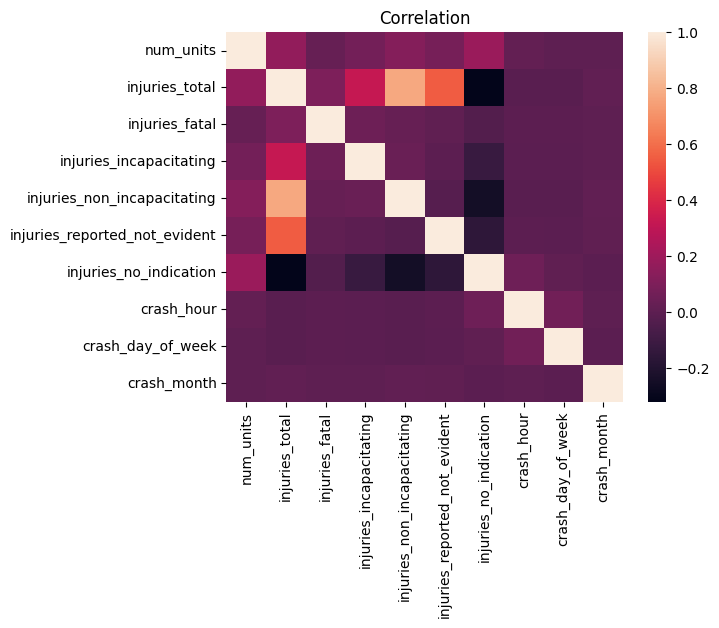

In [25]:
sns.heatmap(data.corr(numeric_only=True))
plt.title("Correlation")
plt.show()

### Data Preprocessing - Label Encoding for Categorical Variables

Data preprocessing is the process of cleaning and transforming raw data into a usable format for analysis or machine learning. It includes handling missing values, encoding categorical variables, scaling numerical data, and removing outliers to ensure the data is consistent, accurate, and ready for modeling.

In [26]:
label_encoders={}
columns_to_encode=['traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i',  'prim_contributory_cause',
        'most_severe_injury','damage']
for col in columns_to_encode:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

Splitting Data into Training and Testing Sets

In [27]:
X=data.drop(columns='crash_type',axis='columns')
y=data['crash_type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
X_train

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,intersection_related_i,damage,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
107732,16,2,3,17,8,3,0,1,1,2,...,2,0.0,0.0,0.0,0.0,0.0,2.0,8,3,1
186507,15,2,3,10,2,3,0,5,1,2,...,2,0.0,0.0,0.0,0.0,0.0,2.0,17,5,8
11408,16,2,3,8,8,3,0,1,1,2,...,2,0.0,0.0,0.0,0.0,0.0,6.0,2,1,3
172329,16,7,4,15,8,3,6,1,1,2,...,2,0.0,0.0,0.0,0.0,0.0,3.0,18,5,10
126736,4,3,3,10,8,3,0,1,1,0,...,2,0.0,0.0,0.0,0.0,0.0,2.0,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111934,15,2,3,8,8,3,0,1,1,2,...,3,1.0,0.0,0.0,1.0,0.0,1.0,15,5,9
31843,16,2,3,17,6,3,0,1,0,0,...,2,0.0,0.0,0.0,0.0,0.0,2.0,14,5,4
43050,4,2,3,17,2,3,0,1,1,2,...,2,0.0,0.0,0.0,0.0,0.0,2.0,11,4,4
37689,16,2,0,0,6,3,0,1,1,2,...,2,0.0,0.0,0.0,0.0,0.0,2.0,4,1,9


In [29]:
y_train

107732    0
186507    1
11408     0
172329    1
126736    1
         ..
111934    0
31843     1
43050     1
37689     0
56122     0
Name: crash_type, Length: 167444, dtype: int64

### Model Evaluation - Training and Testing Set Sizes

Model evaluation is the process of assessing the performance of a machine learning model using specific metrics. It helps determine how well the model generalizes to unseen data. Common evaluation techniques include accuracy, precision, recall, F1 score, confusion matrix, and cross-validation, depending on the type of problem (e.g., classification or regression).

In [30]:
print("Training set size (X_train):", X_train.shape)
print("Training set size (X_test):", X_test.shape)
print("Training set size (y_train):", y_train.shape)
print("Training set size (y_test):", y_test.shape)

Training set size (X_train): (167444, 22)
Training set size (X_test): (41862, 22)
Training set size (y_train): (167444,)
Training set size (y_test): (41862,)


Modeling - Logistic Regression & Model Evaluation

Accuracy Score : 0.8321867087095696
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     18295
           1       0.79      0.96      0.87     23567

    accuracy                           0.83     41862
   macro avg       0.86      0.81      0.82     41862
weighted avg       0.85      0.83      0.83     41862



<Axes: >

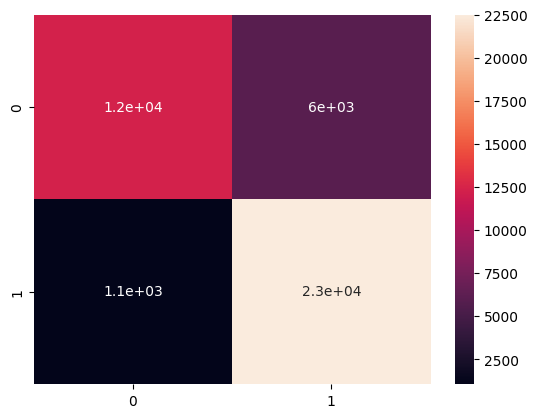

In [31]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
lr.score(X_test,y_test)


print("Accuracy Score :", accuracy_score(y_test, y_predict))
print("Classification Report:")
print(classification_report(y_test, y_predict))


cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

Modeling - Random Forest Classifier & Model Evaluation



Accuracy Score : 0.8359371267497969
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80     18295
           1       0.82      0.90      0.86     23567

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.83     41862



<Axes: >

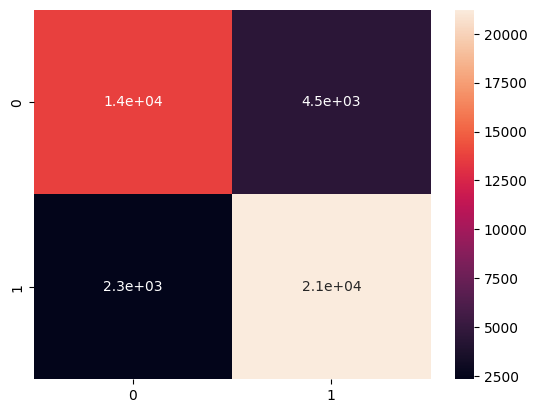

In [32]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)
y_predict=rfc.predict(X_test)


print("Accuracy Score :", accuracy_score(y_test, y_predict))
print("Classification Report:")
print(classification_report(y_test, y_predict))


cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

Modeling - Decision Tree Classifier & Model Evaluation

Accuracy Score : 0.7866322679279537
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     18295
           1       0.82      0.80      0.81     23567

    accuracy                           0.79     41862
   macro avg       0.78      0.78      0.78     41862
weighted avg       0.79      0.79      0.79     41862



<Axes: >

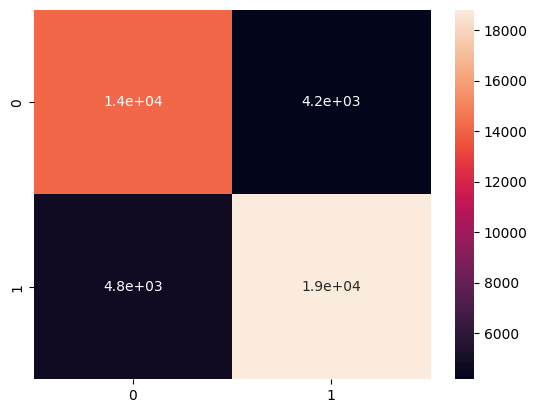

In [33]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)
y_predict=dtc.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_predict))
print("Classification Report:")
print(classification_report(y_test, y_predict))

cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

Model Evaluation - Comparing Multiple Models

In [34]:
models={
    'Logistic_Regression':LogisticRegression(),
    'Random_Forest':RandomForestClassifier(),
    'Decison_Tree_Classifier':DecisionTreeClassifier()
}

In [35]:
results=[]
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    results.append({
        'Model':name,
        'MSE':mse,
        'MAE':mae,
        'R2':r2

    })

for res in results:
    print(res)

{'Model': 'Logistic_Regression', 'MSE': 0.16781329129043046, 'MAE': 0.16781329129043046, 'R2': 0.31792899760369886}
{'Model': 'Random_Forest', 'MSE': 0.16494672973102098, 'MAE': 0.16494672973102098, 'R2': 0.32958003252007695}
{'Model': 'Decison_Tree_Classifier', 'MSE': 0.21382160431895275, 'MAE': 0.21382160431895275, 'R2': 0.13092988719583043}


In [36]:
results_data=pd.DataFrame(results)
print(results_data)

                     Model       MSE       MAE        R2
0      Logistic_Regression  0.167813  0.167813  0.317929
1            Random_Forest  0.164947  0.164947  0.329580
2  Decison_Tree_Classifier  0.213822  0.213822  0.130930


### Model Serialization - Saving the Model with Joblib

Model serialization involves saving a trained machine learning model to a file for future use. Using `joblib`, the model is stored in a binary format, enabling easy loading and deployment without needing to retrain.

In [37]:
joblib.dump(rfc,'Model.joblib')

['Model.joblib']